In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics

In [3]:
data=pd.read_csv('data.csv')

In [4]:
data.drop("Unnamed: 32",axis=1,inplace=True)
data['diagnosis']=data['diagnosis'].map({'M':1,'B':0}) 
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [5]:
features_mean= list(data.columns[2:12])  
features_se= list(data.columns[12:22]) 
features_worst=list(data.columns[22:32])
print("-----------------------------------")
print('Mean set of all features')
print(features_mean)
print(len(features_mean), 'features')
print("-----------------------------------")
print('Standard Error set of all features')
print(features_se)
print(len(features_se), 'features')
print("------------------------------------")
print('Worst set of all features')
print(features_worst)
print(len(features_worst), 'features')
print(' ')
print('Description of data columns')
data.iloc[:,1:].describe()

-----------------------------------
Mean set of all features
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
10 features
-----------------------------------
Standard Error set of all features
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
10 features
------------------------------------
Worst set of all features
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']
10 features
 
Description of data columns


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot: >

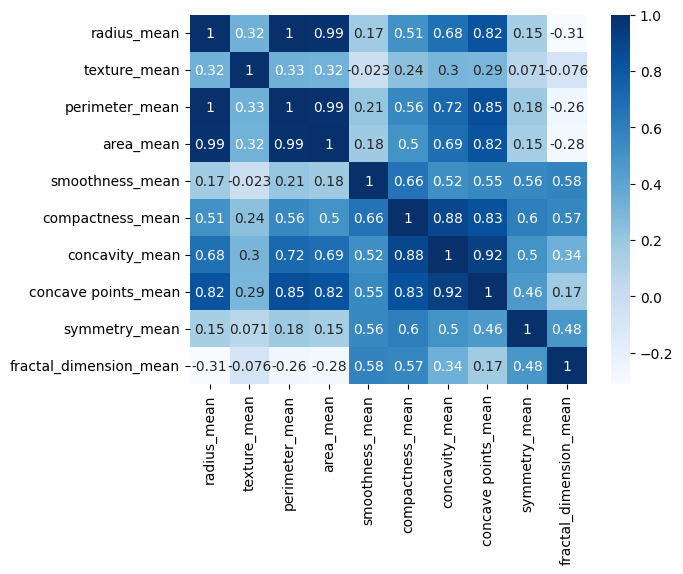

In [6]:
sns.heatmap(data[features_mean].corr(),annot=True,cmap='Blues')

<AxesSubplot: >

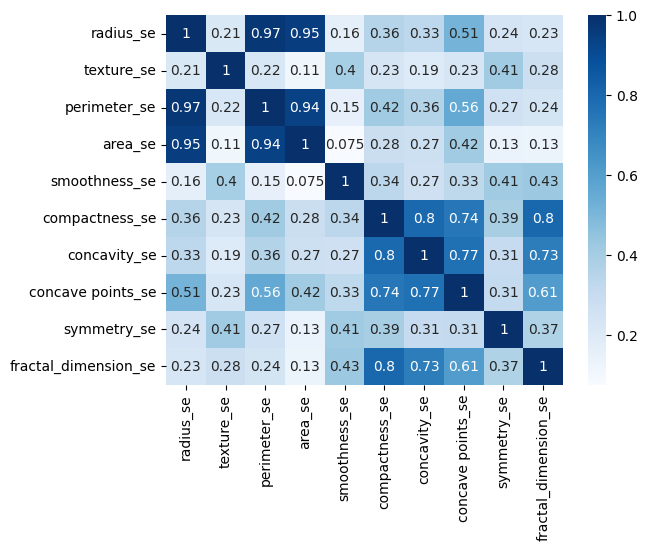

In [7]:
sns.heatmap(data[features_se].corr(),annot=True,cmap='Blues')

<AxesSubplot: >

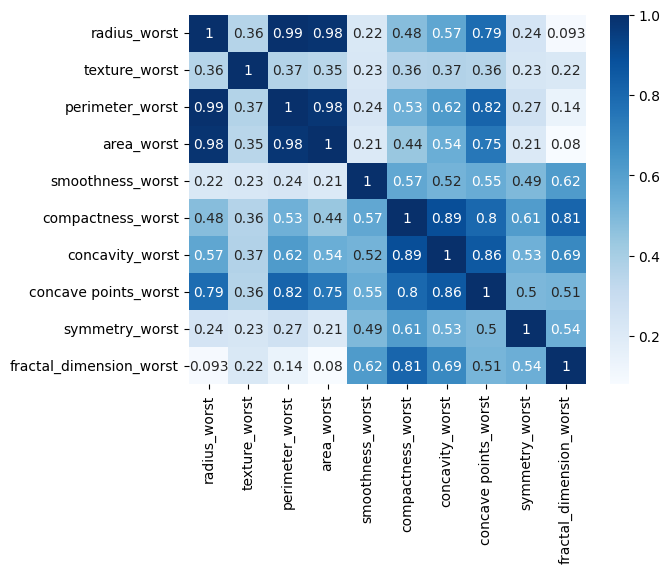

In [8]:
sns.heatmap(data[features_worst].corr(),annot=True,cmap='Blues')

# Deleting features with high correlaction

In [10]:
col_to_drop_corrolated1=['radius_mean','radius_se','radius_worst','area_mean','area_se','area_worst']
col_to_drop_corrolated2=['concavity_mean','concave points_mean', 'concavity_se','concave points_se' ,'concavity_worst','concave points_worst']
data.drop(col_to_drop_corrolated1+col_to_drop_corrolated2,axis=1,inplace=True)
print('I keep only ', len(data.columns) ,' features which are not so corrolated based on the previous analysis')

I keep only  20  features which are not so corrolated based on the previous analysis


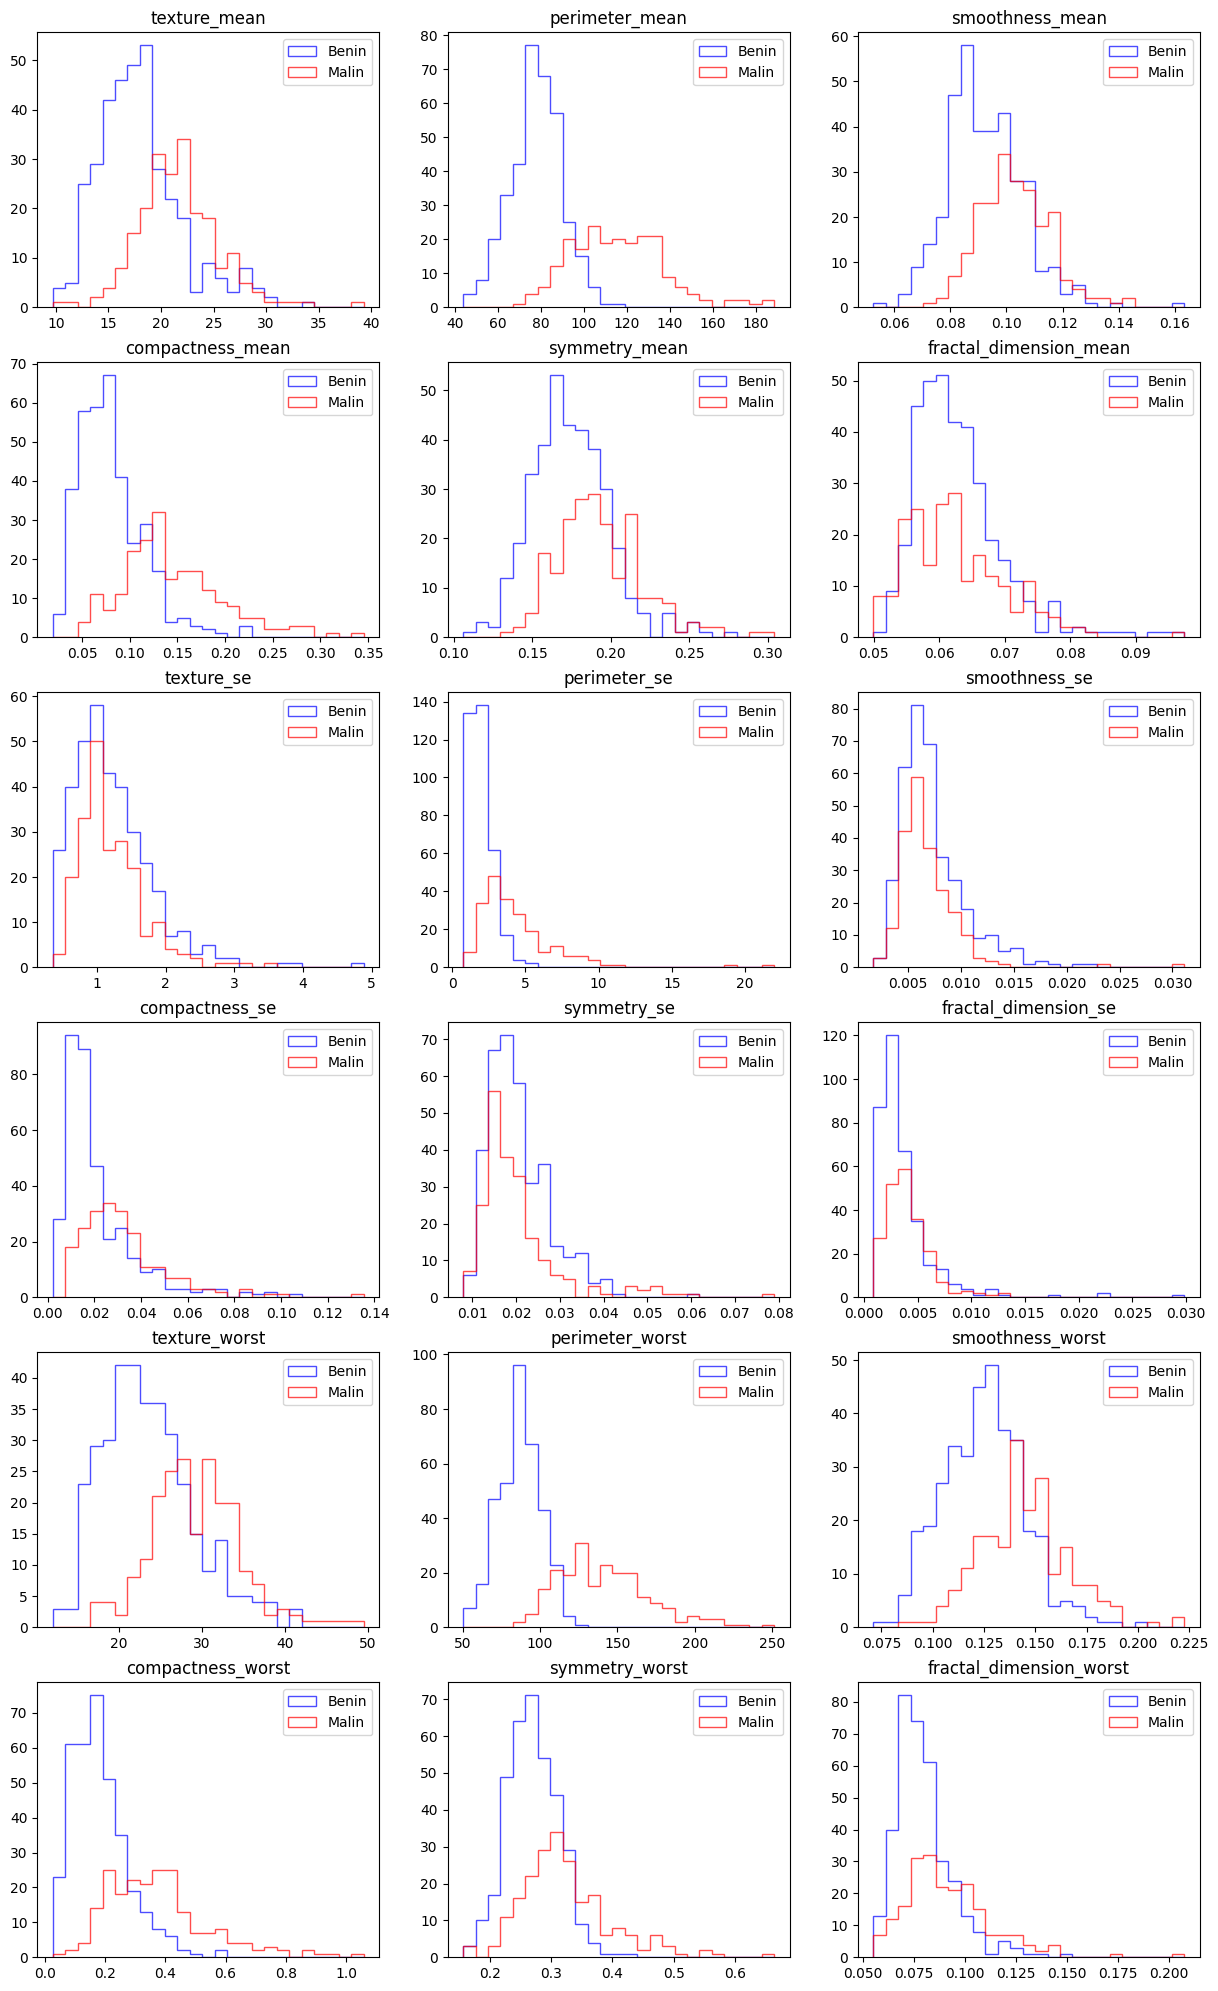

In [11]:
predict = data.diagnosis.unique()
predict_n=['Malin', 'Benin']
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15,25))
i=0
axes = axes.ravel()
for idx,ax in enumerate(axes): # for each chart
    col=data.columns[i+2]
    i=i+1
    ax.hist([data.loc[data.diagnosis == x, col] for x in predict], label=predict_n, bins=25,stacked=False, alpha=0.7,color=['r','b'], histtype='step')
    ax.legend(loc='upper right')
    ax.set_title(col)
plt.show()
    

# Deleting feature with minimal influence based on above graph

In [12]:
col_to_drop_mean=['fractal_dimension_mean', 'symmetry_mean', 'smoothness_mean', 'texture_mean']
col_to_drop_se=['fractal_dimension_se', 'symmetry_se', 'smoothness_se', 'texture_se']
col_to_drop_worst=['fractal_dimension_worst']
col_to_drop_tot=col_to_drop_mean+col_to_drop_se+col_to_drop_worst
data.drop(col_to_drop_tot,axis=1,inplace=True)
print('Now the data set is only composed of ', len(data.columns), 'features')

Now the data set is only composed of  11 features


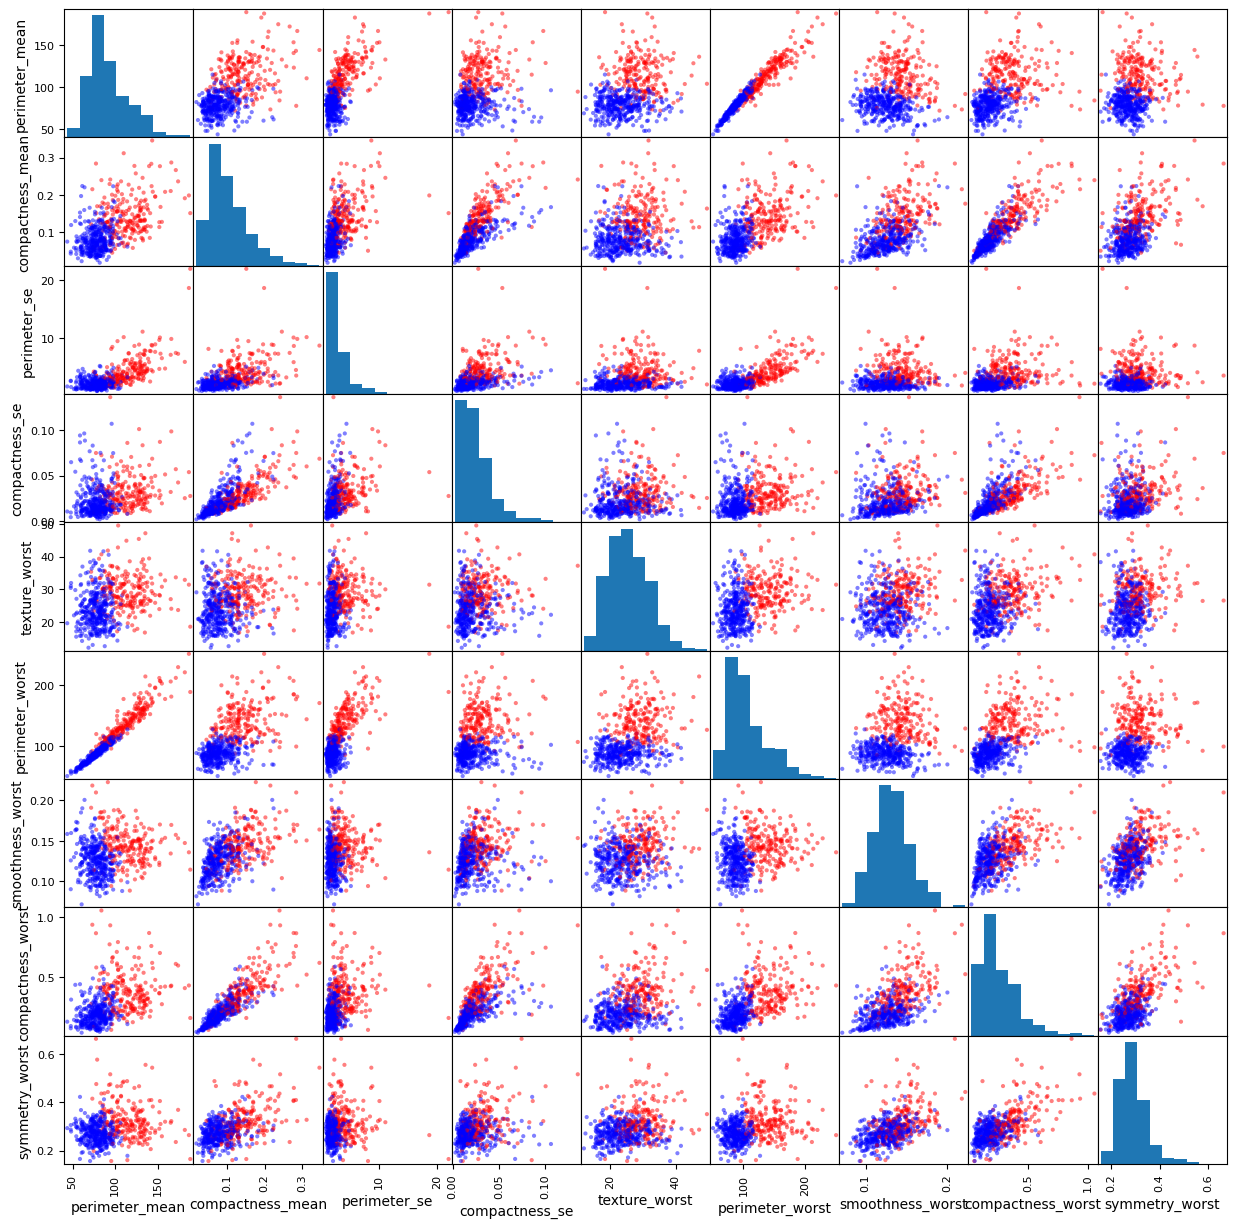

In [13]:
color_function = {0: "blue", 1: "red"}
colors = data["diagnosis"].map(lambda x: color_function.get(x))
pd.plotting.scatter_matrix(data.iloc[:,2:], c=colors, alpha = 0.5, figsize = (15, 15));

In [14]:
print('The most important final features for breast cancer detection are : ')
list(data.columns.values[2:])

The most important final features for breast cancer detection are : 


['perimeter_mean',
 'compactness_mean',
 'perimeter_se',
 'compactness_se',
 'texture_worst',
 'perimeter_worst',
 'smoothness_worst',
 'compactness_worst',
 'symmetry_worst']

# Machine Learning Models

### using 4 different machine learning models and comparing with cross validation and picking the model with the highest accuracy 